In [78]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
citydata=pd.read_csv(city_data_to_load)
ridedata=pd.read_csv(ride_data_to_load)
citydata.head()
ridedata.head()

# Combine the data into a single dataset

alldata=pd.merge(ridedata,citydata,on = "city", how ="left") 

# Display the data table for preview

alldata.head()



,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [79]:
groupcity=alldata.groupby('city').agg({'fare':'mean','driver_count':'first','ride_id':'count','type':'first'})
groupcity.head()

,fare,driver_count,ride_id,type
city,,,,
Amandaburgh,24.641667,12,18,Urban
Barajasview,25.332273,26,22,Urban
Barronchester,36.422500,11,16,Suburban
Bethanyland,32.956111,22,18,Suburban
Bradshawfurt,40.064000,7,10,Rural


 Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

## Bubble Plot of Ride Sharing Data

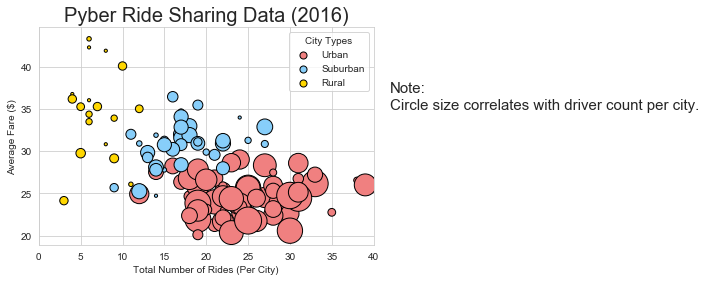

<Figure size 432x288 with 0 Axes>

In [80]:
# Obtain the x and y coordinates for each of the three city types
groupcity=alldata.groupby('city').agg({'fare':'mean','driver_count':'first','ride_id':'count','type':'first'})
groupcity.head()

# Build the scatter plots for each city types
sns.set_style('whitegrid')
for x in zip(groupcity['type'].unique(), ['lightcoral','lightskyblue','gold']):
    
    masked=groupcity[groupcity.type==x[0]]
    plt.scatter(masked['ride_id'], masked['fare'],s=10*masked['driver_count'],c=x[1],label=x[0],edgecolor='black')
#    print(masked.head())
#plt.legend()
# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)',fontsize=20)
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')
plt.xlim((0,40))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize='medium', mode='Expanded',
                 numpoints=1, scatterpoints=1,
                 loc='best', title='City Types',
                 labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [50]
lgnd.legendHandles[1]._sizes = [50]
lgnd.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size
plt.text(42, 35, 'Note:\nCircle size correlates with driver count per city.',fontsize=15)


# Show plot
plt.show()

# Save Figure
plt.savefig('plot1.png')





In [81]:
# Show plot
plt.show()

## Total Fares by City Type

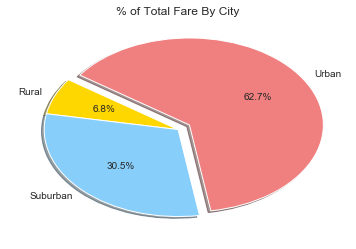

<Figure size 432x288 with 0 Axes>

In [82]:
# Calculate Type Percents
type_df=alldata.groupby('type')
totalfare=type_df.fare.sum()
citycount=type_df.city.count()
citycount
totalfarebyctype=(totalfare/citycount)*100
totalfarebyctype


# Build Pie Chart

city = ["Rural", "Suburban", "Urban"]
totalfarebyctype 
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)

plt.title("% of Total Fare By City")
plt.pie(totalfare, explode=explode, labels=city, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-215)
#plt.axis("equal")
plt.show()

# Save Figure
plt.savefig('plot2.png')

In [83]:
# Show Figure
plt.show()

## Total Rides by City Type

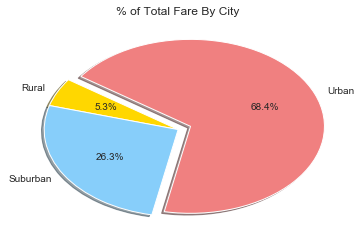

<Figure size 432x288 with 0 Axes>

In [84]:
# Calculate Ride Percents
ridecount=type_df.ride_id.count()
ridecount
# Build Pie Chart
plt.title("% of Total Fare By City")
plt.pie(ridecount, explode=explode, labels=city, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-215)
#plt.axis("equal")
plt.show()
# Save Figure
plt.savefig('plot3.png')

In [85]:
# Show Figure
plt.show()

## Total Drivers by City Type

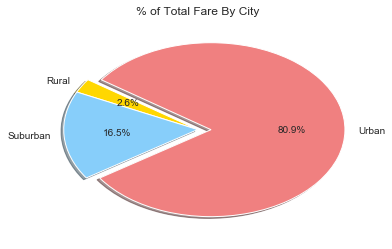

<Figure size 432x288 with 0 Axes>

In [86]:
# Calculate Driver Percents
groupedcity=citydata.groupby('type')
drivercount=groupedcity.driver_count.sum()
drivercount

# Build Pie Charts
plt.title("% of Total Fare By City")
plt.pie(drivercount, explode=explode, labels=city, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-215)
plt.show()
# Save Figure
plt.savefig('plot4.png')


In [87]:
# Show Figure
plt.show()

Three Observable Trends Are:
1:we can see the trend that in Rural areas we have less drivers per city and the fare tends to be much hire.As we move towards     Urban areas count of drivers increase and the ride tends to get cheaper.

2:As we can see in our bubble chart that there are more Urban cities as compared to Suburban and Rural , and the number of         driver are more as well. so we can get to the conclusion that where the density of the city increases the need of commute increase as well.

3:We also see the correlation between number of rides and price per ride . So the price per ride is directly related to the 
  rides per city for each city type.